In [8]:
# add modules folder to Python's search path
from os import times
import sys
from pathlib import Path
from os.path import dirname, realpath, abspath
script_dir = Path(abspath(''))#Path(dirname(realpath(__file__)))
module_dir = str(script_dir.parent.parent)
sys.path.insert(0, module_dir + '/modules')
print(module_dir)
import task
import methods
import utility as ut
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import sklearn.decomposition
import matplotlib.ticker as ticker
from sklearn.manifold import TSNE
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
import numpy as np

C:\Users\pinak\Documents\Github\NMA


In [5]:
db_path = '../../data/hcp_task'
save_folder = 'story_2'
@ut.timer
def score_plot(max_comps=100, k_folds=8, **svm_params):
    score_dict = {'score': [], 'n_comps': [], 'wm_task': []}
    for wm_task in ['0bk', '2bk']:
        conditions = [wm_task + '_' + condition for condition in ['body', 'faces', 'places', 'tools']]
        group = task.Group(db_path)
        data, labels = group.extract_cons(conditions, remove_mean=True)
        data, labels = group.transpose(data)
        for comp in range(max_comps+1):
            print('Working on {} task with n_comps = {}'.format(wm_task, comp), end='\r')
            new_data = sklearn.decomposition.PCA(n_components=comp).fit_transform(data.reshape(data.shape[0], -1))
            svm = methods.SVM(kernel='rbf', **svm_params)
            score_dict['score'] += list(svm.cross_val(new_data, labels, k_folds) * 100.0)
            score_dict['n_comps'] += [comp] * k_folds 
            score_dict['wm_task'] += [wm_task] * k_folds
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111)
    #ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
    df = pd.DataFrame.from_dict(score_dict)
    sns.pointplot(x='n_comps', y='score', hue='wm_task', data=df, ax=ax)
    ax.set_ylabel('SVM accuracy (%)', fontsize=20)
    ax.set_xlabel('number of principal components', fontsize=20)    
    ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))
    ax.xaxis.set_major_locator(ticker.FixedLocator(list(range(0, max_comps+1, 5))))
    ax.tick_params(axis='both', which='major', labelsize=15)
    ax.tick_params(axis='both', which='minor', labelsize=15)
    plt.legend(fontsize=15)
    plt.savefig(save_folder + '/svm_scores.png')
    plt.show()
    df.to_csv(save_folder + '/svm_scores.csv', index=None)
    return df

@ut.timer
def scree_plot(max_comps=100):
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111)
    ax.set_ylabel('cumulative variance explained (%)', fontsize=20)
    ax.set_xlabel('number of principal components', fontsize=20)    
    ax.tick_params(axis='both', which='major', labelsize=15)
    ax.tick_params(axis='both', which='minor', labelsize=15)
    for wm_task in ['0bk', '2bk']:
        conditions = [wm_task + '_' + condition for condition in ['body', 'faces', 'places', 'tools']]
        group = task.Group(db_path)
        data, labels = group.extract_cons(conditions, remove_mean=True)
        pca = sklearn.decomposition.PCA(n_components=max_comps)
        pca.fit_transform(data.reshape(data.shape[0], -1))
        print(np.cumsum(pca.explained_variance_ratio_))
        ax.plot(range(1, max_comps+1), pca.explained_variance_ratio_[:max_comps].cumsum(), label=wm_task)
    ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))
    ax.xaxis.set_major_locator(ticker.FixedLocator(list(range(0, max_comps+1, 5))))
    plt.legend(fontsize=15)
    plt.savefig(save_folder + '/scree.png')
    plt.show()

In [4]:
score_plot(max_comps=25, k_folds=8, gamma=1e-9, C=1.0)

Time taken by extract_con is 0.715090274810791 seconds
Time taken by extract_con is 0.7400979995727539 seconds
Time taken by extract_con is 0.6899747848510742 seconds
Time taken by extract_con is 0.7245471477508545 seconds
Time taken by extract_cons is 3.019517183303833 seconds
Time taken by transpose is 0.21061491966247559 seconds
Time taken by massive_shuffle is 0.030313491821289062 seconds
Time taken by cross_val is 0.03836822509765625 seconds


c:\users\pinak\.conda\envs\py38\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\pinak\.conda\envs\py38\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\pinak\.conda\envs\py38\lib\site-packages\sklearn\svm\_base.py", line 169, in fit
    X, y = self._validate_data(X, y, dtype=np.float64,
  File "c:\users\pinak\.conda\envs\py38\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "c:\users\pinak\.conda\envs\py38\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "c:\users\pinak\.conda\envs\py38\lib\site-packages\sklearn\utils\validation.py", line 814, in check_X_y
    X = check_a

Time taken by massive_shuffle is 0.03486776351928711 seconds
Time taken by cross_val is 0.413623571395874 seconds
Time taken by massive_shuffle is 0.030324935913085938 seconds
Time taken by cross_val is 0.27707839012145996 seconds
Time taken by massive_shuffle is 0.034848690032958984 seconds
Time taken by cross_val is 0.18490219116210938 seconds
Time taken by massive_shuffle is 0.03325486183166504 seconds
Time taken by cross_val is 0.17872214317321777 seconds
Time taken by massive_shuffle is 0.033966064453125 seconds
Time taken by cross_val is 0.1749095916748047 seconds
Time taken by massive_shuffle is 0.03694415092468262 seconds
Time taken by cross_val is 0.1871051788330078 seconds
Time taken by massive_shuffle is 0.033863067626953125 seconds
Time taken by cross_val is 0.19026684761047363 seconds
Time taken by massive_shuffle is 0.030319690704345703 seconds
Time taken by cross_val is 0.1909785270690918 seconds
Time taken by massive_shuffle is 0.03485679626464844 seconds
Time taken by 

c:\users\pinak\.conda\envs\py38\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\pinak\.conda\envs\py38\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\pinak\.conda\envs\py38\lib\site-packages\sklearn\svm\_base.py", line 169, in fit
    X, y = self._validate_data(X, y, dtype=np.float64,
  File "c:\users\pinak\.conda\envs\py38\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "c:\users\pinak\.conda\envs\py38\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "c:\users\pinak\.conda\envs\py38\lib\site-packages\sklearn\utils\validation.py", line 814, in check_X_y
    X = check_a

Time taken by massive_shuffle is 0.02831125259399414 seconds
Time taken by cross_val is 0.40432167053222656 seconds
Time taken by massive_shuffle is 0.029313325881958008 seconds
Time taken by cross_val is 0.29373741149902344 seconds
Time taken by massive_shuffle is 0.03033924102783203 seconds
Time taken by cross_val is 0.1818101406097412 seconds
Time taken by massive_shuffle is 0.02980637550354004 seconds
Time taken by cross_val is 0.14517998695373535 seconds
Time taken by massive_shuffle is 0.030384302139282227 seconds
Time taken by cross_val is 0.15353918075561523 seconds
Time taken by massive_shuffle is 0.038403987884521484 seconds
Time taken by cross_val is 0.16144323348999023 seconds
Time taken by massive_shuffle is 0.035413503646850586 seconds
Time taken by cross_val is 0.16284799575805664 seconds
Time taken by massive_shuffle is 0.039270639419555664 seconds
Time taken by cross_val is 0.16030454635620117 seconds
Time taken by massive_shuffle is 0.03235745429992676 seconds
Time ta

Time taken by score_plot is 109.36478042602539 seconds


score  n_comps wm_task
0      NaN        0     0bk
1      NaN        0     0bk
2      NaN        0     0bk
3      NaN        0     0bk
4      NaN        0     0bk
..     ...      ...     ...
411  100.0       25     2bk
412  100.0       25     2bk
413  100.0       25     2bk
414  100.0       25     2bk
415  100.0       25     2bk

[416 rows x 3 columns]

In [20]:
n_rois = 360
@ut.timer
def tsne(perplexity, pca_comps=None):
    for wm_task in ['0bk', '2bk']:
        conditions = [wm_task + '_' + condition for condition in ['body', 'faces', 'places', 'tools']]
        group = task.Group(db_path)
        data, labels = group.extract_cons(conditions, remove_mean=True)
        data, labels = group.transpose(data)
        #data = group.squash_frames(data)
        if pca_comps is not None:
            X = sklearn.decomposition.PCA(n_components=pca_comps).fit_transform(data.reshape(data.shape[0], -1))
        else:
            X = data.reshape(data.shape[0], -1)
        X = TSNE(n_components=2, perplexity=perplexity).fit_transform(X)
        print(X.shape)
        #X = StandardScaler().fit_transform(X)
        fig = plt.figure(figsize=(10, 10))
        ax = fig.add_subplot(111)
        colors = ['#ff6f69', '#00b159', '#eb6841', '#0e9aa7']
        for i in range(4):
            idx = list(range(i*n_rois, (i+1)*n_rois))
            x = X[idx]
            ax.scatter(x[:, 0], x[:, 1], c=colors[i], label=conditions[i])
        ax.set_xlabel('t-SNE 1st component', fontsize=20)
        ax.set_ylabel('t-SNE 2nd component', fontsize=20)
        ax.tick_params(axis='both', which='major', labelsize=15)
        ax.tick_params(axis='both', which='minor', labelsize=15)
        plt.legend(fontsize=15)
        plt.savefig(save_folder + '/tsne_{}_{}.png'.format(wm_task, pca_comps if pca_comps is not None else ''))
        plt.show()

Time taken by extract_con is 1.7943909168243408 seconds
Time taken by extract_con is 2.059708833694458 seconds
Time taken by extract_con is 1.8237476348876953 seconds
Time taken by extract_con is 1.6894981861114502 seconds
Time taken by extract_cons is 7.555841684341431 seconds
Time taken by transpose is 0.27426695823669434 seconds
(1440, 2)


Time taken by extract_con is 1.3942749500274658 seconds
Time taken by extract_con is 1.4197907447814941 seconds
Time taken by extract_con is 1.2839202880859375 seconds
Time taken by extract_con is 1.2873659133911133 seconds
Time taken by extract_cons is 5.5968146324157715 seconds
Time taken by transpose is 0.27620792388916016 seconds
(1440, 2)


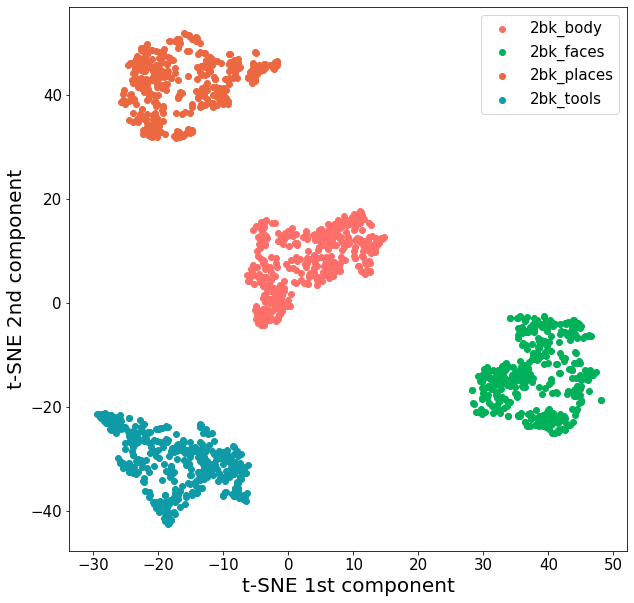

Time taken by tsne is 39.69317078590393 seconds


In [23]:
tsne(50, 10)

Time taken by extract_con is 0.7116732597351074 seconds
Time taken by extract_con is 0.7092022895812988 seconds
Time taken by extract_con is 0.6919400691986084 seconds
Time taken by extract_con is 0.7188527584075928 seconds
Time taken by extract_cons is 2.949259042739868 seconds
[0.0251792  0.04933131 0.06482601 0.08011118 0.09379083 0.10573729
 0.11613742 0.12511829 0.13382677 0.14099988 0.14801306 0.15411244
 0.16000483 0.16557459 0.17100974 0.17577409 0.17994439 0.18401068
 0.18782953 0.19158974 0.19516516 0.19864619 0.20207025 0.20527035
 0.20834359 0.21114401 0.21388012 0.21654666 0.21917216 0.22172322
 0.22425423 0.22677778 0.22919421 0.23155695 0.23387916 0.23618251
 0.23841912 0.2406038  0.24275752 0.2448966  0.24699627 0.24906234
 0.25106972 0.25302559 0.25497028 0.25688362 0.25876507 0.26063126
 0.26246066 0.26426954]
Time taken by extract_con is 0.7199177742004395 seconds
Time taken by extract_con is 0.747520923614502 seconds
Time taken by extract_con is 0.7108743190765381 s

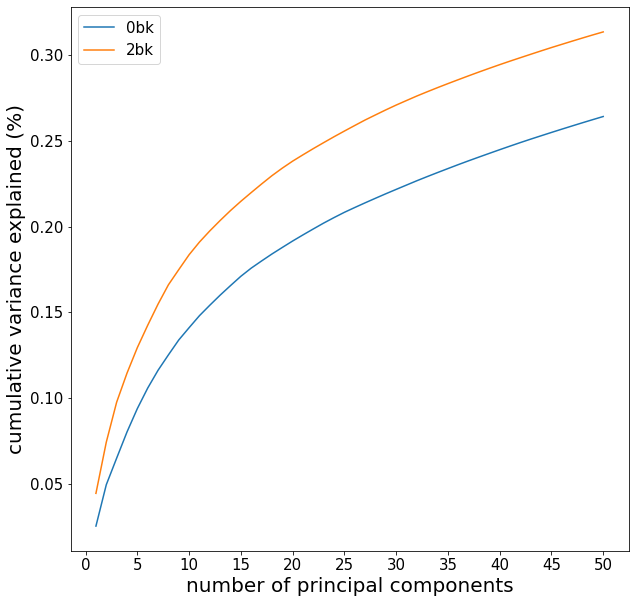

Time taken by scree_plot is 9.153724431991577 seconds


In [9]:
scree_plot(50)

In [ ]:
group = task.Group(db_path)
conditions = ['0bk' + '_' + condition for condition in ['body', 'faces', 'places', 'tools']]
data, labels = group.extract_cons(conditions, remove_mean=True)
data, labels = group.transpose(data)
X = sklearn.decomposition.PCA(n_components=10).fit_transform(data.reshape(data.shape[0], -1))
colors = ['#ff6f69', '#00b159', '#eb6841', '#0e9aa7']
n_rois = 360
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
for i in range(4):
    idx = list(range(i*n_rois, (i+1)*n_rois))
    x = X[idx]
    plt.scatter(x[:, 0], x[:, 1], c=colors[i], label=conditions[i])
ax.set_xlabel('PCA 1st component', fontsize=20)
ax.set_ylabel('PCA 2nd component', fontsize=20)
plt.legend(fontsize=15)
plt.savefig(save_folder + '/pca_2.png')
plt.show()

Time taken by extract_con is 0.687180757522583 seconds
Time taken by extract_con is 0.6999986171722412 seconds
Time taken by extract_con is 0.7020010948181152 seconds
Time taken by extract_con is 0.6880102157592773 seconds
Time taken by extract_cons is 2.9231879711151123 seconds
Time taken by transpose is 0.18999958038330078 seconds
